## Uma empresa decidiu aumentar drasticamente seu investimento em marketing para R$ 100000,00, porém, ela precisa de uma previsão de quantos produtos ela precisa ter em estoque para não haver imprevistos em suas vendas.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importamos as bibliotecas.

In [4]:
ixv = pd.read_excel("Investimento-x-Venda.xlsx")

Extraímos o Dataset.

In [5]:
ixv_sorted = ixv.sort_index(axis=1)
print(ixv_sorted)

    Investimento em marketing  Venda Qtd
0                       20000        180
1                       23000        240
2                       23500        194
3                       24000        190
4                       25000        203
5                       25000        240
6                       27000        270
7                       29000        271
8                       30000        308
9                       32000        300
10                      35000        400
11                      38000        402
12                      40000        337
13                      40000        360
14                      40000        370
15                      40000        420
16                      41000        411
17                      48000        455
18                      50000        511
19                      50000        540
20                      55000        476
21                      60000        550


In [6]:
ixv.head()

,Investimento em marketing,Venda Qtd
0,20000,180
1,23000,240
2,23500,194
3,24000,190
4,25000,203


Certficamos que os dados estão corretos

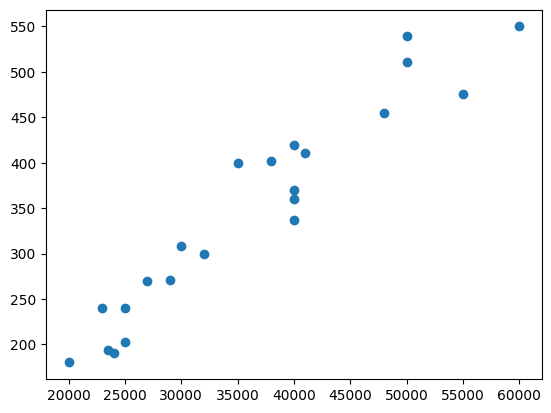

In [7]:
plt.scatter(ixv["Investimento em marketing"],ixv["Venda Qtd"])
plt.show()

Notamos que há um relacionamento linear entre as duas variáveis, ou seja, quando o investimento em marketing cresce, as vendas crescem em uma proporção diretamente proporcional. 

Vamos traçar uma linha entre o menor e o maior valor

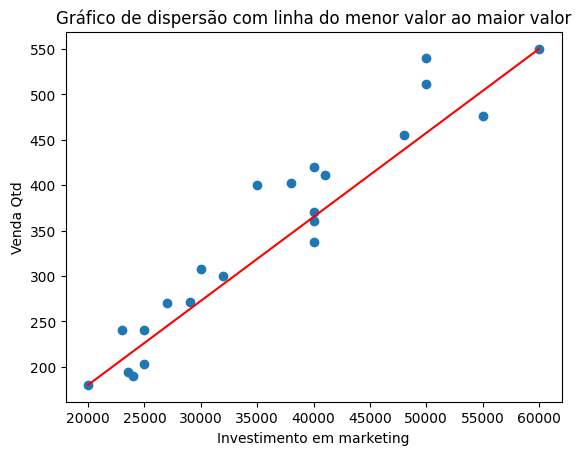

In [8]:
def scatter_with_line(ixv):
    sorted_ixv = ixv.sort_values(by='Investimento em marketing')
    investimento = sorted_ixv['Investimento em marketing']
    venda_qtd = sorted_ixv['Venda Qtd']
    #primeiro ordenamos os dados

    plt.scatter(investimento, venda_qtd)
    # criamos o grafico de dispersão
    plt.plot([investimento.iloc[0], investimento.iloc[-1]], [venda_qtd.iloc[0], venda_qtd.iloc[-1]], color='red')
    # e traçamos a linha
    plt.xlabel('Investimento em marketing')
    plt.ylabel('Venda Qtd')
    plt.title('Gráfico de dispersão com linha do menor valor ao maior valor')
    
    plt.show()
scatter_with_line(ixv)

 Ultilizando machine learning para encontrar o valor definido

In [9]:
from sklearn import linear_model

In [10]:
reg = linear_model.LinearRegression()

In [29]:
reg.fit(ixv["Investimento em marketing"].values.reshape(-1, 1),ixv["Venda Qtd"])

LinearRegression()

In [30]:
reg.coef_

array([0.00981645])

In [31]:
reg.intercept_

-8.226478255593406

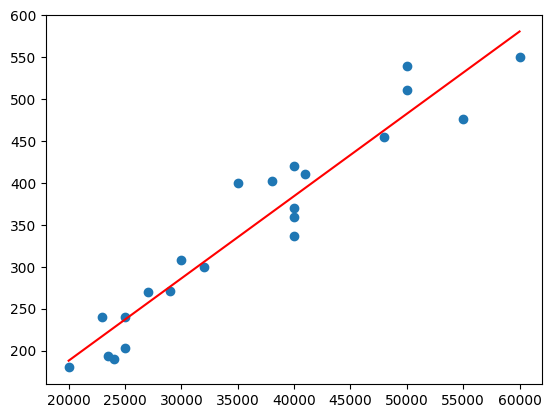

In [42]:
# Iremos ultilizar machine learning para descobrir a linha que traça o melhor caminho com base nos resultados dos primeiros investimentos.
plt.scatter(ixv["Investimento em marketing"],ixv["Venda Qtd"])
x = np.array(ixv["Investimento em marketing"])
y = reg.intercept_ + a*reg.coef_
plt.plot(a,b,"r")
plt.show()

In [43]:
reg.predict([[100000]])

array([973.41808763])

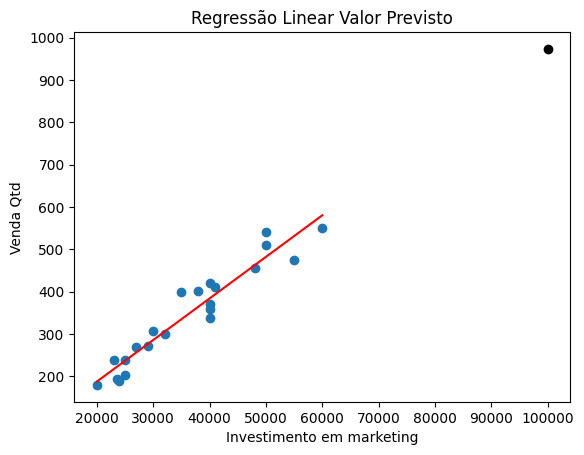

In [44]:
plt.scatter(ixv["Investimento em marketing"],ixv["Venda Qtd"])
plt.scatter(100000,reg.predict([[100000]])[0],color="k")
a = np.array(ixv["Investimento em marketing"])
b = reg.intercept_ + a*reg.coef_
plt.plot(a,b,"r")
plt.xlabel('Investimento em marketing')
plt.ylabel('Venda Qtd')
plt.title('Regressão Linear Valor Previsto')
plt.show()

Aqui já temos nosso valor definido e plotado no gráfico.

In [47]:
Venda_Prevista=reg.predict([[100000]])
print(Venda_Prevista)

[973.41808763]


 Portanto, com um investimento de R$100000,00 em marketing a empresa deve ter uma venda prevista de pelo menos 973 produtos com base em nossa previsão.